In [631]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


#Graphing parameters
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['black', 'red', 'blue'])
plt.rcParams['figure.figsize'] =  [8, 3]
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams.update({'font.size': 11})
plt.rcParams['font.family'] = 'serif'


In [632]:
# Variable initialization
V0 = 200  # L
X0 = 30  # g/L
S0 = 0  # g/L
P0 = 0  # g/L
f = 50  # L/h
V_max = 800  # L
V_remove = 600  # L
S_F = 100  # g/L
mu_max = 0.2  # 1/h
Ks = 0.5  # g/L
Ki = 50  # g/L
Y_x_s = 0.3  # gcells/gglucose
qp = 0.08  # gproduct/gcells/h


In [633]:
#functions that define growth rates
def mu(S):
    return mu_max * S / (Ks + S + (S**2 / Ki)) #inhibited substrate growth rate

def mu1(S):
    return mu_max * S / (Ks + S) #non inhibited substrate growth rate

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


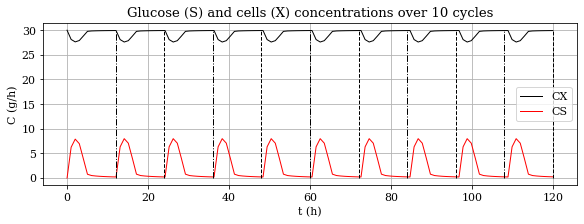

In [634]:
def equations(variables, t): #single cycle differential equations
    X, S, P, V = variables
    
    # Calculate the dilution rate
    D = f / V
    
    # Volume change
    
    dV = f
    
    # Update equations
    dX_dt = X * (mu(S) - D)
    dS_dt = D * (S_F - S) - mu(S) * X / Y_x_s
    dP_dt = qp * X - P * D
    
    return dX_dt, dS_dt, dP_dt, dV

# Time points for solving a single cycle
t = np.linspace(0, 12, 13)


# Initial conditions
condition_initiales = [X0, S0, P0, V0]

#Initialize the necessary arrays
X=np.array([])
S=np.array([])
P=np.array([])
V=np.array([])
P_final=np.array([])

# Solve the differential equations for 10 cycles, ie call the equations function 10 times, changing the initial values to the final concentration values found in the previous cycle
# and the value is set back to 200L (V0)
for i in range (0, 10):
    solution = odeint(equations, condition_initiales, t)
    X1, S1, P1, V1 = solution.T
    P_final=np.append(P_final, P1[-1]) #only keep the values of products at the end of a cycle (they are the concentrations you are getting rid of)
    #Append the values found for each cycle to concentrations and volume arrays
    X=np.append(X,X1[:-1]) 
    S=np.append(S, S1[:-1])
    P=np.append(P, P1[:-1])
    V=np.append(V, V1[:-1])
    condition_initiales = [X1[-1], S1[-1], P1[-1], V0]

    
    
#Plot the aquired concentrations for cells and substrate
t_plot = np.linspace(0, 120, 120)
plt.xlabel("t (h)")
plt.ylabel("C (g/h)")
plt.plot(t_plot, X, t_plot, S)
#lines differentiate one cycle from the next
plt.vlines(12, 0, 30,  linestyles='dashdot')
plt.vlines(24, 0, 30,  linestyles='dashed')
plt.vlines(36, 0, 30,  linestyles='dashdot')
plt.vlines(48, 0, 30,  linestyles='dashed')
plt.vlines(60, 0, 30,  linestyles='dashdot')
plt.vlines(72, 0, 30,  linestyles='dashed')
plt.vlines(84, 0, 30,  linestyles='dashdot')
plt.vlines(96, 0, 30,  linestyles='dashed')
plt.vlines(108, 0, 30,  linestyles='dashdot')
plt.vlines(120, 0, 30,  linestyles='dashed')
plt.title("Glucose (S) and cells (X) concentrations over 10 cycles")
plt.legend(["CX", "CS"])
plt.grid()
#save figure
plt.savefig('10_cycles.eps', format='eps')

In [635]:
#Calculate the total mass of product. Take the last concentration of all the cycles (g/L), multiply by 600 L each and sum to have the total weight. 
P_g=np.sum(P_final*600)
print(P_g/1000) #kg

136.87309300814263


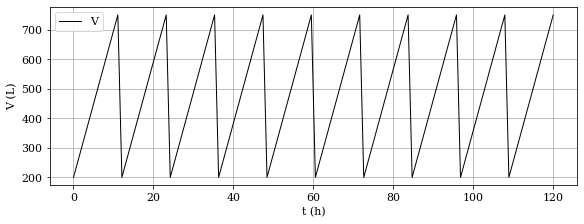

In [636]:
#Plot the volume change
t = np.linspace(0, 120, 120)
plt.xlabel("t (h)")
plt.ylabel("V (L)")
plt.plot(t, V)
plt.legend(["V"])
plt.grid()

In [637]:
#Differential equations for the non inhibited case (using non inhibited growth rate mu1)
def equations1(variables, t): #single cycle
    X, S, P, V = variables
    
    # Calculate the dilution rate
    D = f / V
    
    # Volume change
    
    dV = f
    
    # Update equations
    dX_dt = X * (mu1(S) - D)
    dS_dt = D * (S_F - S) - mu1(S) * X / Y_x_s
    dP_dt = qp * X - P * D
    
    return dX_dt, dS_dt, dP_dt, dV


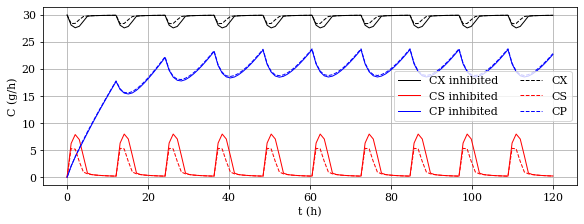

In [638]:
t = np.linspace(0, 12, 13)

# Initial conditions
condition_initiales = [X0, S0, P0, V0]

#initiate the necessary arrays
X_1=np.array([])
S_1=np.array([])
P_1=np.array([])
V_1=np.array([])
# Solve the differential equations
for i in range (0, 10): #run 10 times the single cycle not inhibited differential equations with odeint
    solution = odeint(equations1, condition_initiales, t)
    X1, S1, P1, V1 = solution.T

    X_1=np.append(X_1,X1[:-1])
    S_1=np.append(S_1, S1[:-1])
    P_1=np.append(P_1, P1[:-1])
    V_1=np.append(V_1, V1[:-1])
    condition_initiales = [X1[-1], S1[-1], P1[-1], V0]

#Plot all the gathered information. Compare the inhibited and non inhibited case. 
t_plot = np.linspace(0, 120, 120)
plt.xlabel("t (h)")
plt.ylabel("C (g/h)")

plt.plot(t_plot, X, t_plot, S, t_plot, P)
plt.plot(t_plot, X_1, '--', t_plot, S_1, '--', t_plot, P_1, '--')

plt.legend(["CX inhibited", "CS inhibited", "CP inhibited", "CX", "CS", "CP"], ncols=2)
plt.grid()

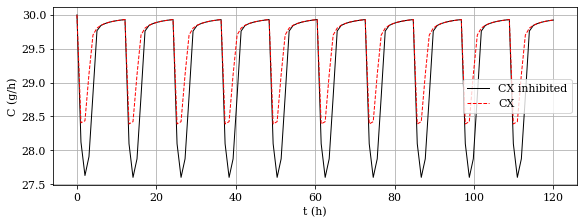

In [639]:

#zoom of the inhibited cell concentration and non inhibited cell concentrations. 
t_plot = np.linspace(0, 120, 120)
plt.xlabel("t (h)")
plt.ylabel("C (g/h)")

plt.plot(t_plot, X) #inhibited sf=100 g/h
plt.plot(t_plot, X_1, '--') #not inhibited sf=100 g/h

plt.legend(["CX inhibited", "CX"])
plt.grid()

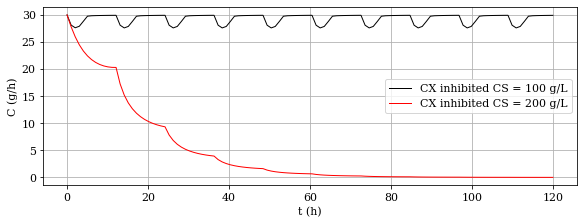

In [640]:
def equations2(variables, t): #change the feed substarte concentration by 2 folds (200 instead of 100 g/L)
    X, S, P, V = variables
    
    # Calculate the dilution rate
    D = f / V
    
    # Volume change
    
    dV = f
    
    # Update equations #differential equations for 1 cycle
    dX_dt = X * (mu(S) - D)
    dS_dt = D * (200 - S) - mu(S) * X / Y_x_s #increase by 2 folds
    dP_dt = qp * X - P * D
    
    return dX_dt, dS_dt, dP_dt, dV

t = np.linspace(0, 12, 13)
condition_initiales = [X0, S0, P0, V0]
X_2=np.array([])
S_2=np.array([])
P_2=np.array([])
V_2=np.array([])
# Solve the differential equations
for i in range (0, 10): #run 10 cycles 
    solution = odeint(equations2, condition_initiales, t)
    X2, S2, P2, V2 = solution.T

    X_2=np.append(X_2,X2[:-1])
    S_2=np.append(S_2, S2[:-1])
    P_2=np.append(P_2, P2[:-1])
    V_2=np.append(V_2, V2[:-1])
    condition_initiales = [X2[-1], S2[-1], P2[-1], V0]
 

#Plot the found concentrations
t_plot = np.linspace(0, 120, 120)
plt.xlabel("t (h)")
plt.ylabel("C (g/h)")

plt.plot(t_plot, X) #inhibited 
plt.plot(t_plot, X_2) #inhibited with more substrate

plt.legend(["CX inhibited CS = 100 g/L", "CX inhibited CS = 200 g/L"])
plt.grid()

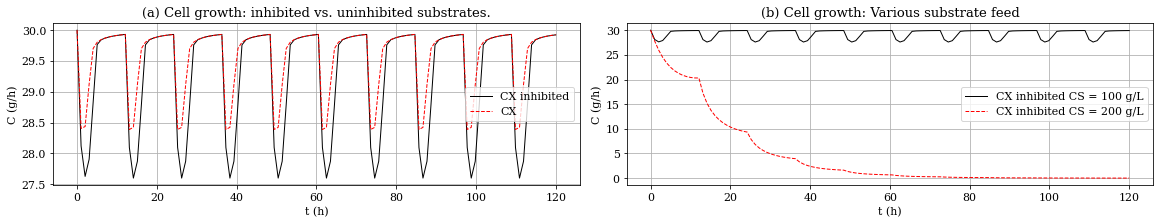

<Figure size 576x216 with 0 Axes>

In [641]:
#Create subplots of the 2 previous graphs for the report.

fig, axs = plt.subplots(1, 2, figsize=(16,3))

# First subplot
axs[0].plot(t_plot, X)
axs[0].set_title("(a) Cell growth: inhibited vs. uninhibited substrates.")
axs[0].plot(t_plot, X_1, '--')
axs[0].set_xlabel("t (h)")
axs[0].set_ylabel("C (g/h)")
axs[0].legend(["CX inhibited", "CX"])
axs[0].grid()

# Second subplot
axs[1].plot(t_plot, X)
axs[1].set_title("(b) Cell growth: Various substrate feed")
axs[1].plot(t_plot, X_2, '--')
axs[1].set_xlabel("t (h)")
axs[1].set_ylabel("C (g/h)")
axs[1].legend(["CX inhibited CS = 100 g/L", "CX inhibited CS = 200 g/L"])
axs[1].grid()

# Adjust layout


# Show the plot
plt.show()
plt.savefig("increasing_s_f.eps", format='eps', bbox_inches='tight')

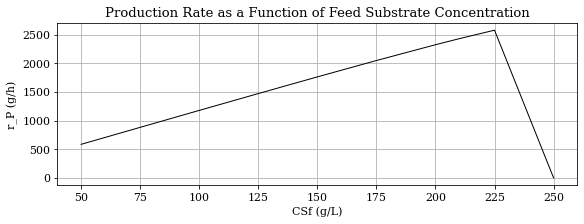

In [642]:
#various substrate feed concentrations (g/L)
Sf=np.array([50,75, 100, 125, 150, 175, 200,210, 225, 250])
#initialise necessary lists
P_final=[]
P_Sf=[]

def equations4(variables, t): 
    X, S, P, V = variables
    
    # Calculate the dilution rate
    D = f / V
    
    # Volume change
    
    dV = f
    
    # Update equations
    dX_dt = X * (mu(S) - D)
    dS_dt = D * (S_f - S) - mu(S) * X / Y_x_s #increase by 2 folds
    dP_dt = qp * X - P * D
    
    return dX_dt, dS_dt, dP_dt, dV

#run the single cycle differential equation for each different substrate feed concentration 10 times (thus 10 cycles)
t = np.linspace(0, 12, 13)
condition_initiales = [X0, S0, P0, V0]
X_4=np.array([])
S_4=np.array([])
P_4=np.array([])
V_4=np.array([])
# Solve the differential equations
for j in range (0,10): 
    S_f = Sf[j]
    #print(S_f)
    P_final=[]
    for i in range (0, 10):
        solution = odeint(equations4, condition_initiales, t)
        X4, S4, P4, V4 = solution.T
        P_final.append(P4[-1]) # keep the product concentrations at the end of each cycle
        condition_initiales = [X4[-1], S4[-1], P4[-1], V0]
    P_Sf.append(P_final)


P_Sf=np.array(P_Sf)
#mass of product removed from 10th cycle/ cycle time
A, B, C, D, E, F, G, H, I, J = P_Sf

#production rate is mass of product removed from 10th cycle (product concentration at end of 10th cycle * 600 L)/ single cycle time (12h)
production_rate = [A[-1]*600/12, B[-1]*600/12, C[-1]*600/12, D[-1]*600/12, E[-1]*600/12, F[-1]*600/12, G[-1]*600/12, H[-1]*600/12, I[-1]*600/12, J[-1]*600/12]

# Plot the production rate as a function of feed substrate concentration.
plt.xlabel("CSf (g/L)")
plt.ylabel(f"r_P (g/h)")
plt.title("Production Rate as a Function of Feed Substrate Concentration")
plt.plot(Sf, production_rate) #production rate with changing Sf 

plt.grid()

plt.savefig('production.eps', format='eps')